In [1]:
print('Pranav')

Pranav


# LINEAR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from fbprophet import Prophet
%matplotlib inline

import numpy as np
import seaborn as sb

import warnings;
warnings.simplefilter('ignore')

In [3]:
monthly = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Month.csv', sep=';')
monthly.columns = ["Year","Month","Decimal date","sunspot number","standard deviation","observations","indicator"]

In [8]:
monthly

,Year,Month,Decimal date,sunspot number,standard deviation,observations,indicator,date
0,1749,2,1749.123,104.3,-1.0,-1,1,1749-02-01
1,1749,3,1749.204,116.7,-1.0,-1,1,1749-03-01
2,1749,4,1749.288,92.8,-1.0,-1,1,1749-04-01
3,1749,5,1749.371,141.7,-1.0,-1,1,1749-05-01
4,1749,6,1749.455,139.2,-1.0,-1,1,1749-06-01
...,...,...,...,...,...,...,...,...
3260,2020,10,2020.791,14.4,1.2,662,0,2020-10-01
3261,2020,11,2020.873,34.0,2.9,661,0,2020-11-01
3262,2020,12,2020.958,21.8,5.5,812,0,2020-12-01
3263,2021,1,2021.042,10.4,4.7,833,0,2021-01-01


In [9]:
monthly['date'] = monthly['Year'].map(str) + '/' + monthly['Month'].map(str)  # used to combine year, month
monthly.head()

,Year,Month,Decimal date,sunspot number,standard deviation,observations,indicator,date
0,1749,2,1749.123,104.3,-1.0,-1,1,1749/2
1,1749,3,1749.204,116.7,-1.0,-1,1,1749/3
2,1749,4,1749.288,92.8,-1.0,-1,1,1749/4
3,1749,5,1749.371,141.7,-1.0,-1,1,1749/5
4,1749,6,1749.455,139.2,-1.0,-1,1,1749/6


In [10]:
monthly['date'] = pd.to_datetime(monthly['date'], infer_datetime_format=True)
monthly.tail()

,Year,Month,Decimal date,sunspot number,standard deviation,observations,indicator,date
3260,2020,10,2020.791,14.4,1.2,662,0,2020-10-01
3261,2020,11,2020.873,34.0,2.9,661,0,2020-11-01
3262,2020,12,2020.958,21.8,5.5,812,0,2020-12-01
3263,2021,1,2021.042,10.4,4.7,833,0,2021-01-01
3264,2021,2,2021.122,8.3,4.2,959,0,2021-02-01


In [11]:
monthly.dtypes

Year                           int64
Month                          int64
Decimal date                 float64
sunspot number               float64
standard deviation           float64
observations                   int64
indicator                      int64
date                  datetime64[ns]
dtype: object

In [8]:
monthly.drop(['Year','Month','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
monthly.columns=['y','ds']

In [9]:
monthly.head()

,y,ds
0,104.3,1749-02-01
1,116.7,1749-03-01
2,92.8,1749-04-01
3,141.7,1749-05-01
4,139.2,1749-06-01


In [10]:
monthly.dtypes

y            float64
ds    datetime64[ns]
dtype: object

In [11]:
m = Prophet(interval_width = 0.8,
            n_changepoints=25,
            changepoint_range=0.8,
            changepoint_prior_scale=1,
            seasonality_mode='additive')
mdl = m.fit(monthly)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods = 9, freq = 'M')
forecast = m.predict(future)
forecast.head().T

,0,1,2,3,4
ds,1749-02-01 00:00:00,1749-03-01 00:00:00,1749-04-01 00:00:00,1749-05-01 00:00:00,1749-06-01 00:00:00
trend,85.9489,85.8045,85.6446,85.4899,85.33
yhat_lower,-3.89343,3.70176,10.8746,15.0286,-0.834699
yhat_upper,166.451,163.494,172.348,168.903,170.055
trend_lower,85.9489,85.8045,85.6446,85.4899,85.33
trend_upper,85.9489,85.8045,85.6446,85.4899,85.33
additive_terms,-1.86979,-3.64553,-0.175701,4.8923,1.23737
additive_terms_lower,-1.86979,-3.64553,-0.175701,4.8923,1.23737
additive_terms_upper,-1.86979,-3.64553,-0.175701,4.8923,1.23737
yearly,-1.86979,-3.64553,-0.175701,4.8923,1.23737


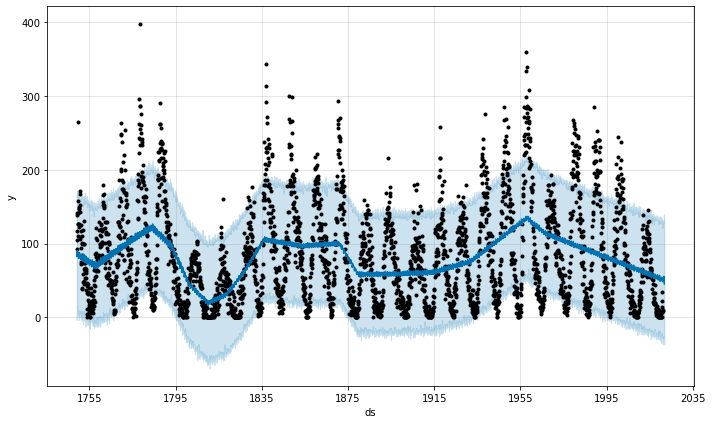

In [13]:
plot_q = mdl.plot(forecast)

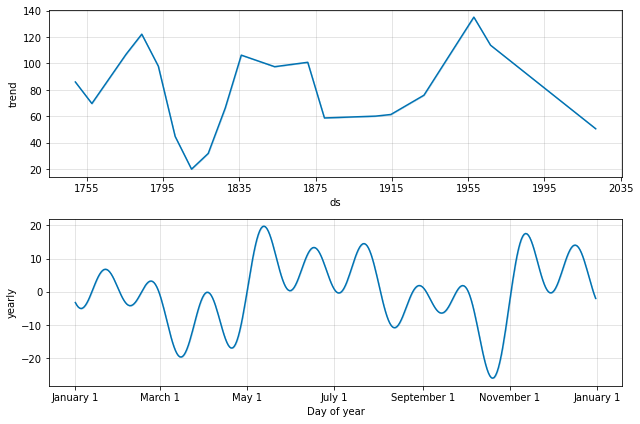

In [14]:
plot_e = mdl.plot_components(forecast)

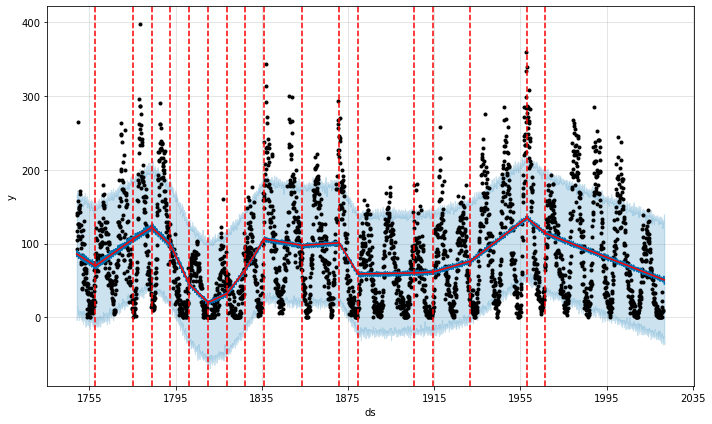

In [15]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast,plot_cap=True, uncertainty=True)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Cross Validation 

In [16]:
from fbprophet.diagnostics import cross_validation

In [17]:
monthly_CV = cross_validation(mdl, initial='96500 days',period='135 days', horizon='273 days', parallel = 'processes')
monthly_CV.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 2013-04-26 00:00:00 and 2020-05-04 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000029FA504BB20>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-05-01,66.446510,-12.393694,147.855883,120.2,2013-04-26
1,2013-06-01,67.768459,-14.956083,147.877711,76.7,2013-04-26
2,2013-07-01,68.199903,-15.379704,150.545619,86.2,2013-04-26
3,2013-08-01,69.818736,-16.483698,149.281445,91.8,2013-04-26
4,2013-09-01,68.238262,-13.574723,152.135967,54.5,2013-04-26


In [18]:
from fbprophet.diagnostics import performance_metrics

In [19]:
monthly_pm = performance_metrics(monthly_CV)
monthly_pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,27 days,2229.527743,47.217875,43.641217,9.259299,0.593772,1.0
1,28 days,2140.679705,46.267480,42.850767,7.447920,0.593772,1.0
2,30 days,2155.377637,46.426045,42.534330,8.004790,1.589634,1.0
3,33 days,2206.861597,46.977246,43.012736,8.074563,1.589634,1.0
4,35 days,2174.390806,46.630364,42.173725,8.052245,1.589634,1.0


In [20]:
from fbprophet.plot import plot_cross_validation_metric

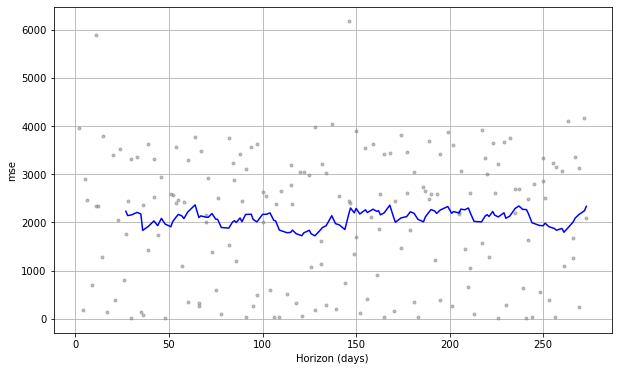

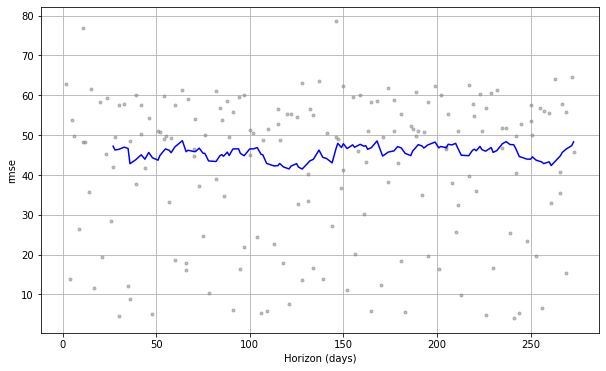

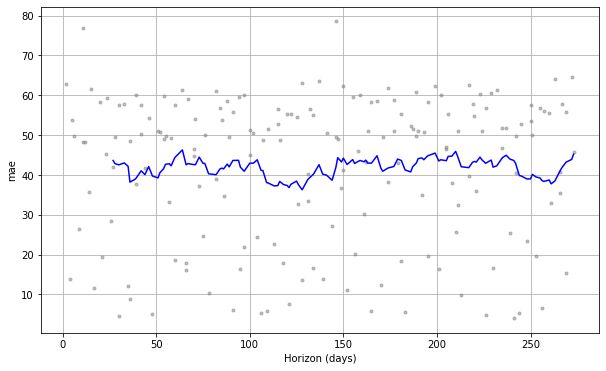

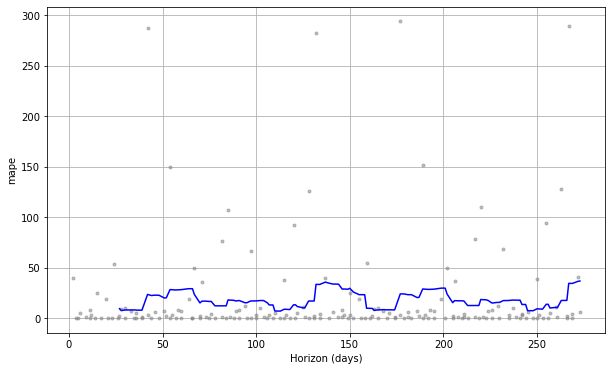

In [21]:
plt_mse = plot_cross_validation_metric(monthly_CV ,metric='mse')
plt_rmse = plot_cross_validation_metric(monthly_CV ,metric='rmse')
plt_mae = plot_cross_validation_metric(monthly_CV ,metric='mae')
plt_mape = plot_cross_validation_metric(monthly_CV ,metric='mape')

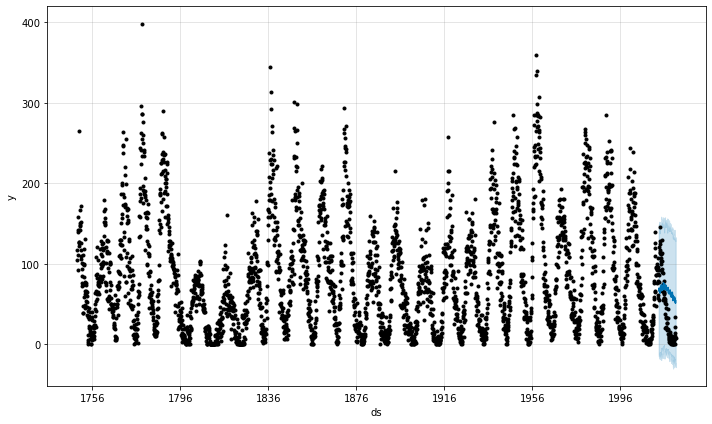

In [22]:
plot = mdl.plot(monthly_CV)

In [23]:
r2_mn = r2_score(monthly_CV['y'],monthly_CV['yhat'])

In [24]:
r2_mn

-0.21202023247206858

# Finding the outliers using IQR

In [25]:
Q1 = np.percentile(monthly['y'], 25)
Q2 = np.percentile(monthly['y'], 50)
Q3 = np.percentile(monthly['y'], 75)
print(Q1)
print(Q2)
print(Q3)

23.9
67.1
122.5


In [26]:
from scipy import stats

In [27]:
IQR = stats.iqr(monthly['y'])
IQR

98.6

In [28]:
low_lim = Q1 - 1.5 * IQR  # LOWER LIMIT
upr_lim = Q3 + 1.5 * IQR  # UPPER LIMIT
print(low_lim)
print(upr_lim)

-123.99999999999997
270.4


In [29]:
outlier = []
for i in monthly['y']:
    if ((i>upr_lim or i<low_lim)):
        outlier.append(i)
print('These are the outliers we\'re looking for:', outlier)
print('The number of outliers present are:', len(outlier))

These are the outliers we're looking for: [295.5, 398.2, 286.0, 286.2, 276.2, 290.0, 343.8, 313.4, 292.6, 271.2, 300.6, 298.3, 293.6, 270.9, 275.6, 285.0, 285.0, 272.0, 284.3, 334.0, 359.4, 298.6, 339.0, 286.7, 277.6, 271.0, 283.5, 285.1, 307.7, 282.6, 284.5]
The number of outliers present are: 31


<AxesSubplot:xlabel='y'>

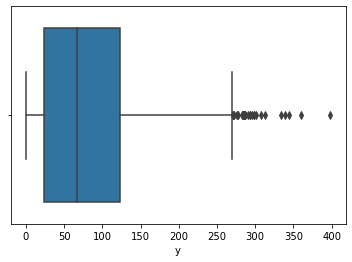

In [30]:
sb.boxplot(monthly['y'])

# LOGISTIC

# 9 Months

In [31]:
monthly__lg_9 = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Month.csv', sep=';')
monthly__lg_9.columns = ["Year","Month","Decimal date","sunspot number","standard deviation","observations","indicator"]

In [32]:
monthly__lg_9.head()

,Year,Month,Decimal date,sunspot number,standard deviation,observations,indicator
0,1749,2,1749.123,104.3,-1.0,-1,1
1,1749,3,1749.204,116.7,-1.0,-1,1
2,1749,4,1749.288,92.8,-1.0,-1,1
3,1749,5,1749.371,141.7,-1.0,-1,1
4,1749,6,1749.455,139.2,-1.0,-1,1


In [33]:
monthly__lg_9['date'] = monthly__lg_9['Year'].map(str) + '/' + monthly__lg_9['Month'].map(str)
monthly__lg_9.head()

,Year,Month,Decimal date,sunspot number,standard deviation,observations,indicator,date
0,1749,2,1749.123,104.3,-1.0,-1,1,1749/2
1,1749,3,1749.204,116.7,-1.0,-1,1,1749/3
2,1749,4,1749.288,92.8,-1.0,-1,1,1749/4
3,1749,5,1749.371,141.7,-1.0,-1,1,1749/5
4,1749,6,1749.455,139.2,-1.0,-1,1,1749/6


In [34]:
monthly__lg_9['date'] = pd.to_datetime(monthly__lg_9['date'], infer_datetime_format=True)
monthly__lg_9.tail()

,Year,Month,Decimal date,sunspot number,standard deviation,observations,indicator,date
3260,2020,10,2020.791,14.4,1.2,662,0,2020-10-01
3261,2020,11,2020.873,34.0,2.9,661,0,2020-11-01
3262,2020,12,2020.958,21.8,5.5,812,0,2020-12-01
3263,2021,1,2021.042,10.4,4.7,833,0,2021-01-01
3264,2021,2,2021.122,8.3,4.2,959,0,2021-02-01


In [35]:
monthly__lg_9.drop(['Year','Month','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
monthly__lg_9.columns=['y','ds']

In [36]:
m_lg_9 = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=1,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [37]:
m_lg_9.add_seasonality(name = 'Monthly', period = 30.5, fourier_order = 6, prior_scale=0.5)

In [38]:
Cap = monthly__lg_9['y'].quantile(0.95)
monthly__lg_9['cap'] = Cap

Floor =monthly__lg_9['y'].quantile(0.05)
monthly__lg_9['floor'] = Floor

mdl_lg_9 = m_lg_9.fit(monthly__lg_9)

In [39]:
future_lg_9 = mdl_lg_9.make_future_dataframe(periods = 9, freq = 'M')
future_lg_9['cap'] = Cap
future_lg_9['floor'] = Floor

forecast_lg_9 = m_lg_9.predict(future_lg_9)

future_lg_9.head()

,ds,cap,floor
0,1749-02-01,217.02,2.7
1,1749-03-01,217.02,2.7
2,1749-04-01,217.02,2.7
3,1749-05-01,217.02,2.7
4,1749-06-01,217.02,2.7


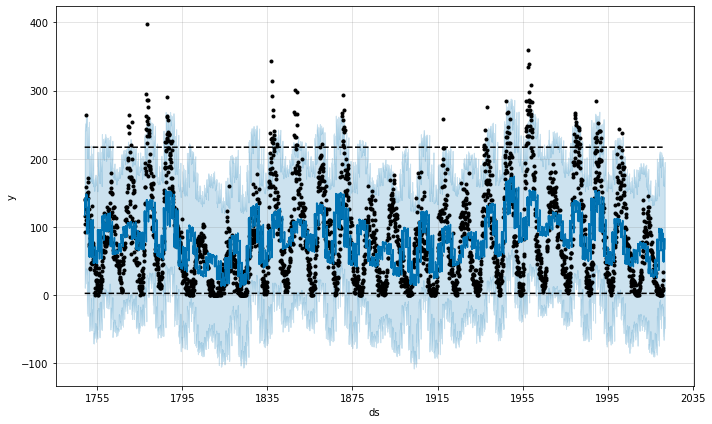

In [40]:
plot_1_lg_9 = mdl_lg_9.plot(forecast_lg_9)

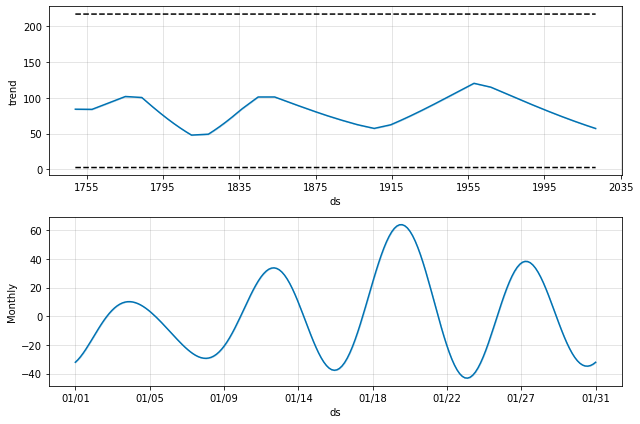

In [41]:
plot_2_lg_9 = mdl_lg_9.plot_components(forecast_lg_9)

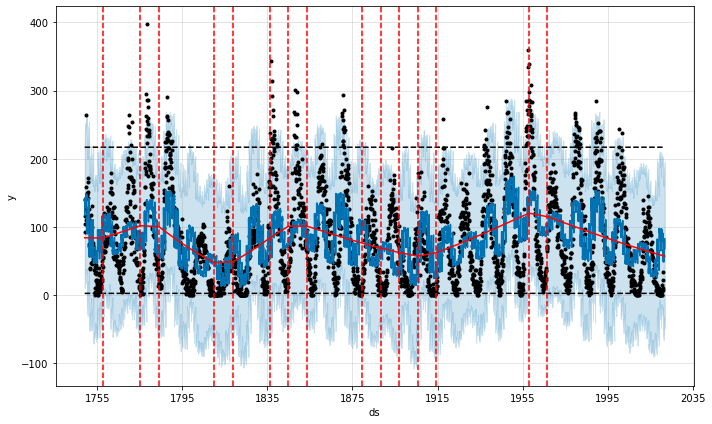

In [42]:
from fbprophet.plot import add_changepoints_to_plot
fig_lg_9 = m_lg_9.plot(forecast_lg_9,plot_cap=True, uncertainty=True)
a_lg_9 = add_changepoints_to_plot(fig_lg_9.gca(), m_lg_9, forecast_lg_9)

# Cross Validation 9 Months

In [43]:
from fbprophet.diagnostics import cross_validation

In [44]:
Monthly_CV_lg_9 = cross_validation(mdl_lg_9, initial='96500 days',period='135 days', horizon='273 days')
Monthly_CV_lg_9.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 2013-04-26 00:00:00 and 2020-05-04 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-05-01,48.284946,-66.518074,154.936619,120.2,2013-04-26
1,2013-06-01,59.872241,-51.721099,170.084134,76.7,2013-04-26
2,2013-07-01,48.150413,-69.185001,157.778120,86.2,2013-04-26
3,2013-08-01,59.737778,-49.968837,177.969988,91.8,2013-04-26
4,2013-09-01,70.115384,-43.179263,176.978776,54.5,2013-04-26


In [45]:
from fbprophet.diagnostics import performance_metrics

In [46]:
Monthly_PM_lg_9 = performance_metrics(Monthly_CV_lg_9)
Monthly_PM_lg_9.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,27 days,4342.651180,65.898795,56.995380,14.340327,0.636515,1.0
1,28 days,4224.296172,64.994586,56.380073,11.534547,0.636515,1.0
2,30 days,4060.168281,63.719450,55.441000,11.891726,0.809300,1.0
3,33 days,3823.266457,61.832568,54.104768,11.767857,0.809300,1.0
4,35 days,3836.313548,61.937981,54.804247,11.779159,0.809300,1.0


In [47]:
from fbprophet.plot import plot_cross_validation_metric

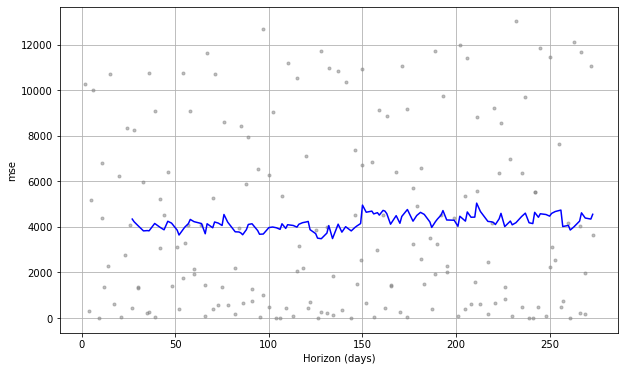

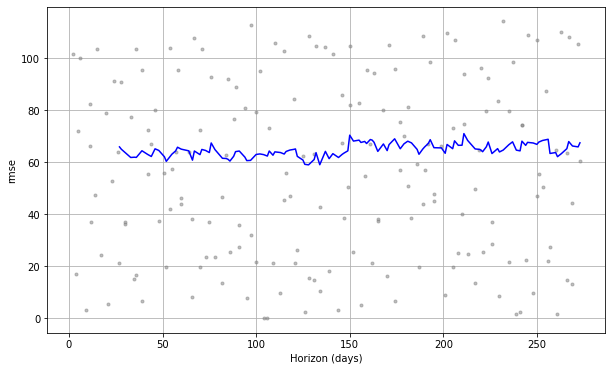

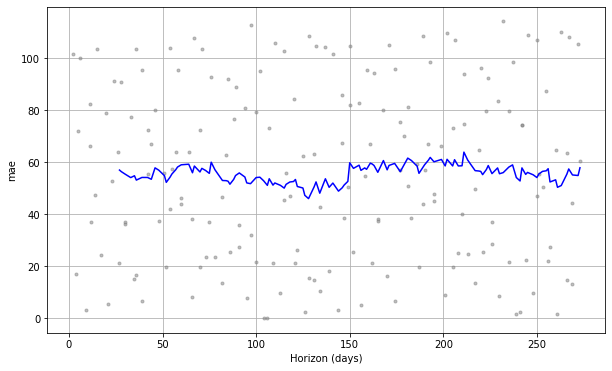

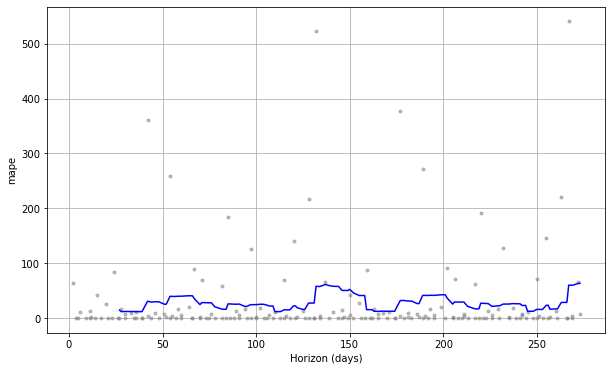

In [48]:
plt_mse_lg_9 = plot_cross_validation_metric(Monthly_CV_lg_9 ,metric='mse')
plt_rmse_lg_9 = plot_cross_validation_metric(Monthly_CV_lg_9 ,metric='rmse')
plt_mae_lg_9 = plot_cross_validation_metric(Monthly_CV_lg_9 ,metric='mae')
plt_mape_lg_9 = plot_cross_validation_metric(Monthly_CV_lg_9 ,metric='mape')

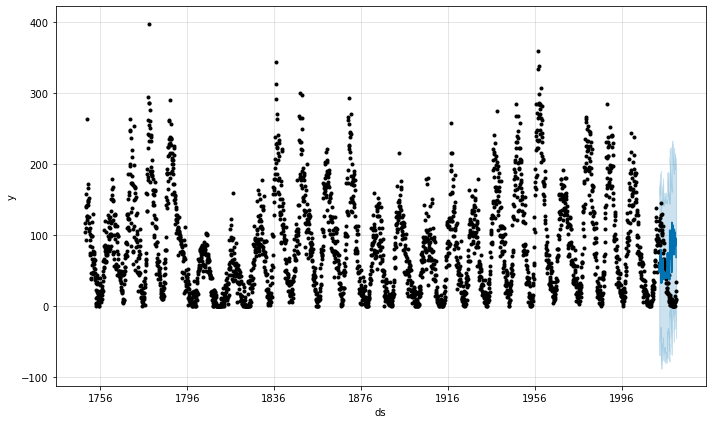

In [49]:
plot_3_lg_9 = mdl_lg_9.plot(Monthly_CV_lg_9)

In [50]:
r2_mn_9 = r2_score(Monthly_CV_lg_9['y'],Monthly_CV_lg_9['yhat'])

In [51]:
r2_mn_9

-1.453463387502091

# 6 Months

In [52]:
monthly__lg_6 = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Month.csv', sep=';')
monthly__lg_6.columns = ["Year","Month","Decimal date","sunspot number","standard deviation","observations","indicator"]

In [53]:
6monthly__lg_6['date'] = monthly__lg_6['Year'].map(str) + '/' + monthly__lg_6['Month'].map(str)

In [54]:
monthly__lg_6['date'] = pd.to_datetime(monthly__lg_6['date'], infer_datetime_format=True)

In [55]:
monthly__lg_6.drop(['Year','Month','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
monthly__lg_6.columns=['y','ds']

In [56]:
m_lg_6 = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=1,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [57]:
m_lg_6.add_seasonality(name = 'Monthly', period = 30.5, fourier_order = 5, prior_scale=0.5)

In [58]:
Cap = monthly__lg_6['y'].quantile(0.95)
monthly__lg_6['cap'] = Cap

Floor =monthly__lg_6['y'].quantile(0.05)
monthly__lg_6['floor'] = Floor

mdl_lg_6 = m_lg_6.fit(monthly__lg_6)

In [59]:
future_lg_6 = mdl_lg_6.make_future_dataframe(periods = 6, freq = 'M')
future_lg_6['cap'] = Cap
future_lg_6['floor'] = Floor

forecast_lg_6 = m_lg_6.predict(future_lg_6)

future_lg_6.head()

,ds,cap,floor
0,1749-02-01,217.02,2.7
1,1749-03-01,217.02,2.7
2,1749-04-01,217.02,2.7
3,1749-05-01,217.02,2.7
4,1749-06-01,217.02,2.7


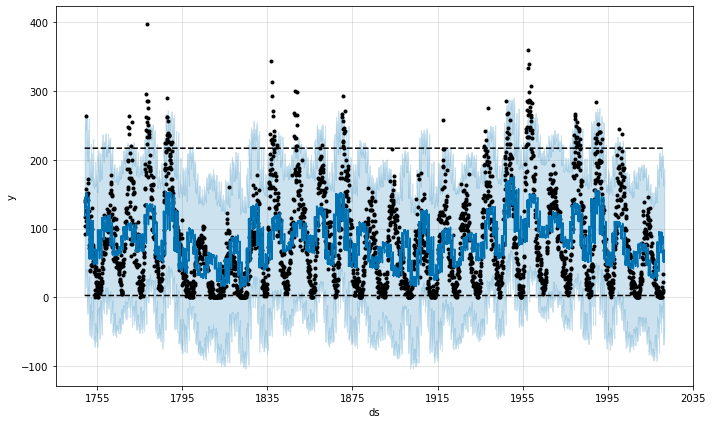

In [60]:
plot_4_lg_6 = mdl_lg_6.plot(forecast_lg_6)

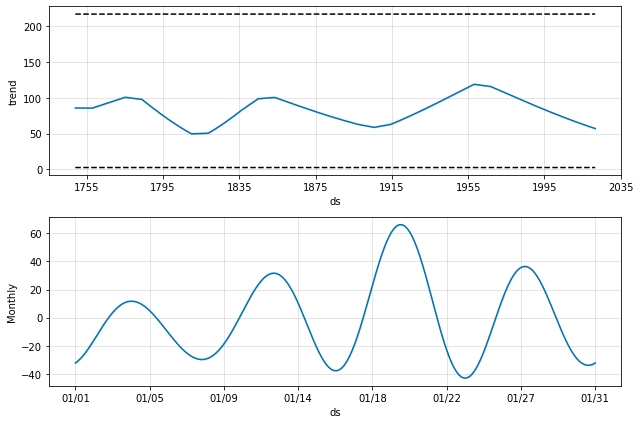

In [61]:
plot_5_lg_6 = mdl_lg_6.plot_components(forecast_lg_6)

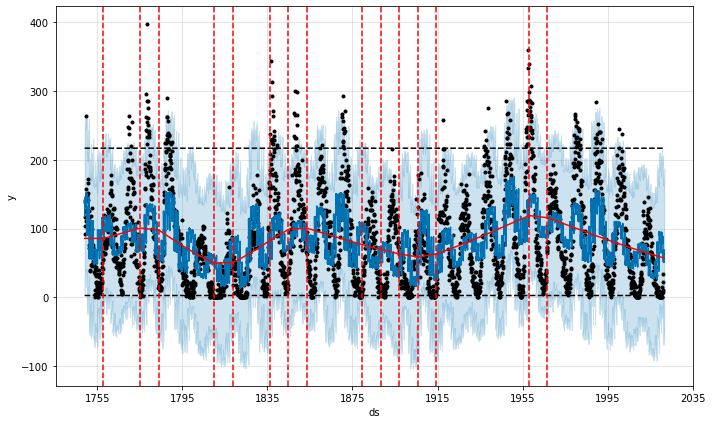

In [62]:
from fbprophet.plot import add_changepoints_to_plot
fig_3_lg_6 = mdl_lg_6.plot(forecast_lg_6,plot_cap=True, uncertainty=True)
a_3_lg_6 = add_changepoints_to_plot(fig_3_lg_6.gca(), mdl_lg_6, forecast_lg_6)

# Cross Validation 6 Month

In [63]:
from fbprophet.diagnostics import cross_validation

In [64]:
Monthly_CV_lg_6 = cross_validation(mdl_lg_6, initial='97000 days',period='91.25 days', horizon='182.5 days')
Monthly_CV_lg_6.head()

INFO:fbprophet:Making 24 forecasts with cutoffs between 2014-11-03 18:00:00 and 2020-08-02 12:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-12-01,45.824428,-61.746651,162.150226,112.9,2014-11-03 18:00:00
1,2015-01-01,54.133989,-63.255590,167.629247,93.0,2014-11-03 18:00:00
2,2015-02-01,64.157872,-52.289269,177.589665,66.7,2014-11-03 18:00:00
3,2015-03-01,47.509816,-72.414557,149.880945,54.5,2014-11-03 18:00:00
4,2015-04-01,41.285872,-73.776843,149.352915,75.3,2014-11-03 18:00:00


In [65]:
from fbprophet.diagnostics import performance_metrics

In [66]:
Monthly_PM_lg_6 = performance_metrics(Monthly_CV_lg_6)
Monthly_PM_lg_6.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,28 days 00:00:00,4119.356552,64.182214,53.213119,15.389992,1.582396,1.0
1,28 days 06:00:00,4547.128442,67.432399,59.354355,20.354143,3.254102,1.0
2,28 days 12:00:00,4216.786025,64.936785,55.298710,25.502498,5.187709,1.0
3,28 days 18:00:00,4686.366422,68.457041,59.077683,26.561005,10.592562,1.0
4,29 days 12:00:00,4839.378191,69.565639,60.647632,34.481147,17.289037,1.0


In [67]:
from fbprophet.plot import plot_cross_validation_metric

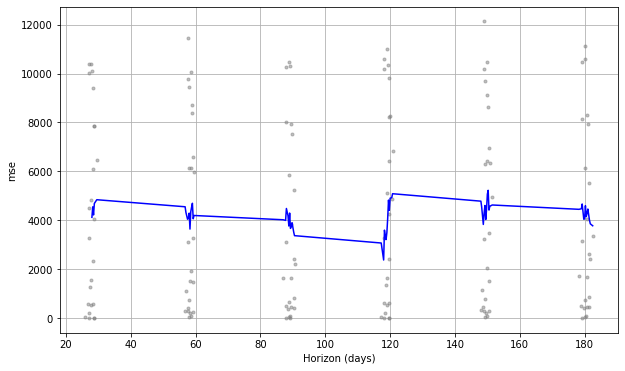

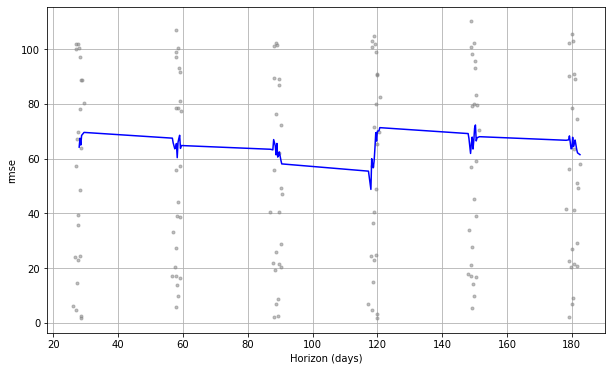

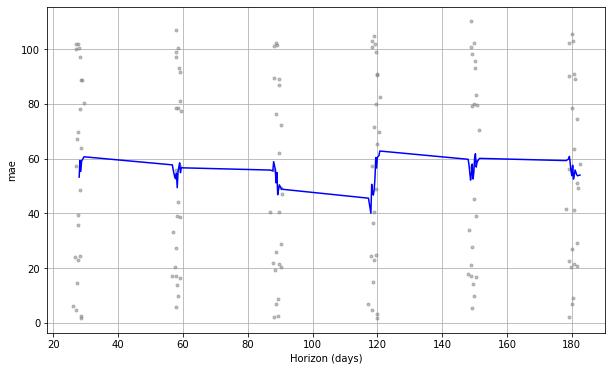

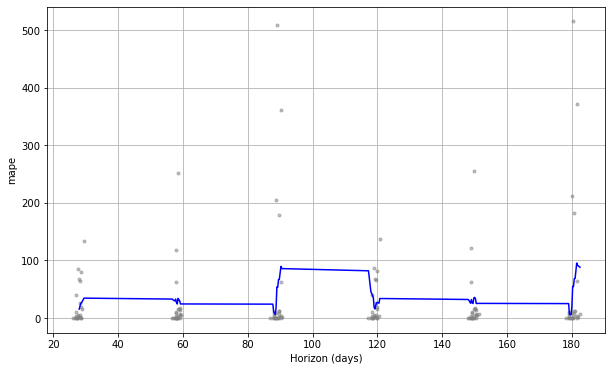

In [68]:
plt_mse = plot_cross_validation_metric(Monthly_CV_lg_6 ,metric='mse')
plt_rmse = plot_cross_validation_metric(Monthly_CV_lg_6 ,metric='rmse')
plt_mae = plot_cross_validation_metric(Monthly_CV_lg_6 ,metric='mae')
plt_mape = plot_cross_validation_metric(Monthly_CV_lg_6 ,metric='mape')

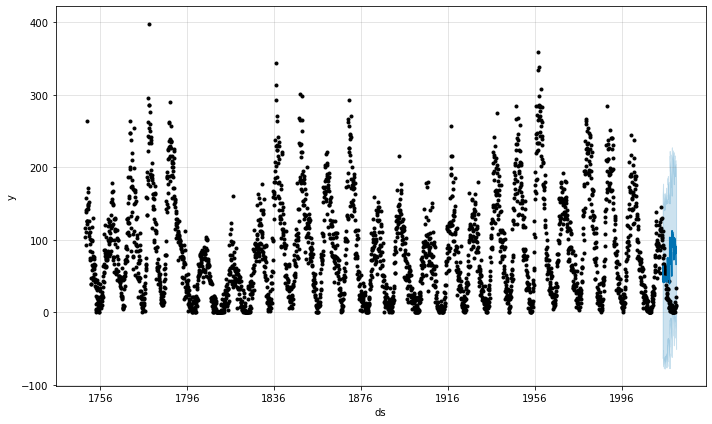

In [69]:
plot_6_lg_6 = mdl_lg_6.plot(Monthly_CV_lg_6)

In [70]:
r2_mn_6 = r2_score(Monthly_CV_lg_6['y'],Monthly_CV_lg_6['yhat'])

In [71]:
r2_mn_6

-5.227522298863213

# 1 Month

In [72]:
monthly_lg_1 = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Month.csv', sep=';')
monthly_lg_1.columns = ["Year","Month","Decimal date","sunspot number","standard deviation","observations","indicator"]

In [73]:
monthly_lg_1['date'] = monthly_lg_1['Year'].map(str) + '/' + monthly_lg_1['Month'].map(str)

In [74]:
monthly_lg_1['date'] = pd.to_datetime(monthly_lg_1['date'], infer_datetime_format=True)

In [75]:
monthly_lg_1.drop(['Year','Month','Decimal date','standard deviation','observations','indicator'],axis=1,inplace=True)
monthly_lg_1.columns=['y','ds']

In [76]:
m_lg_1 = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=1,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [77]:
m_lg_1.add_seasonality(name = 'Monthly', period = 30.5, fourier_order = 10, prior_scale=0.5)

In [78]:
Cap = monthly_lg_1['y'].quantile(0.95)
monthly_lg_1['cap'] = Cap

Floor =monthly_lg_1['y'].quantile(0.05)
monthly_lg_1['floor'] = Floor

mdl_lg_1 = m_lg_1.fit(monthly_lg_1)

In [79]:
future_lg_1 = mdl_lg_1.make_future_dataframe(periods = 1, freq = 'M')
future_lg_1['cap'] = Cap
future_lg_1['floor'] = Floor

forecast_lg_1 = m_lg_1.predict(future_lg_1)

future_lg_1.head()

,ds,cap,floor
0,1749-02-01,217.02,2.7
1,1749-03-01,217.02,2.7
2,1749-04-01,217.02,2.7
3,1749-05-01,217.02,2.7
4,1749-06-01,217.02,2.7


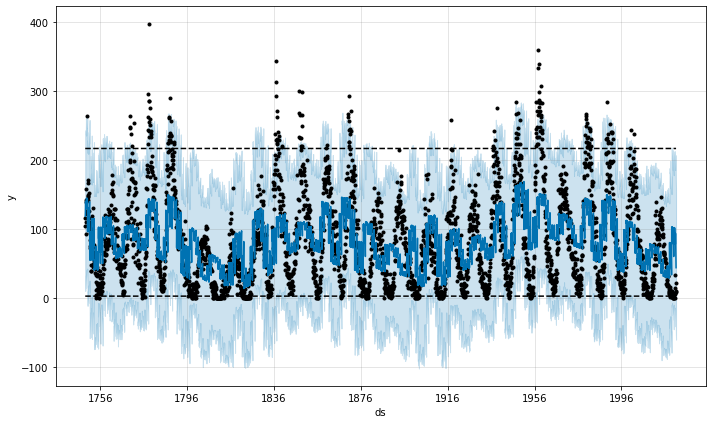

In [80]:
plot_7_lg_1 = mdl_lg_1.plot(forecast_lg_1)

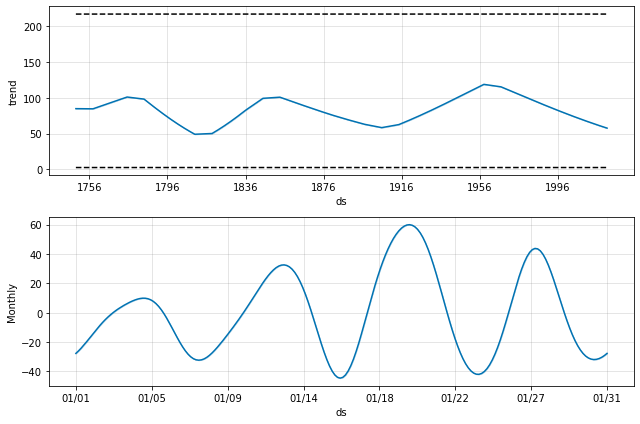

In [81]:
plot_8_lg_1 = mdl_lg_1.plot_components(forecast_lg_1)

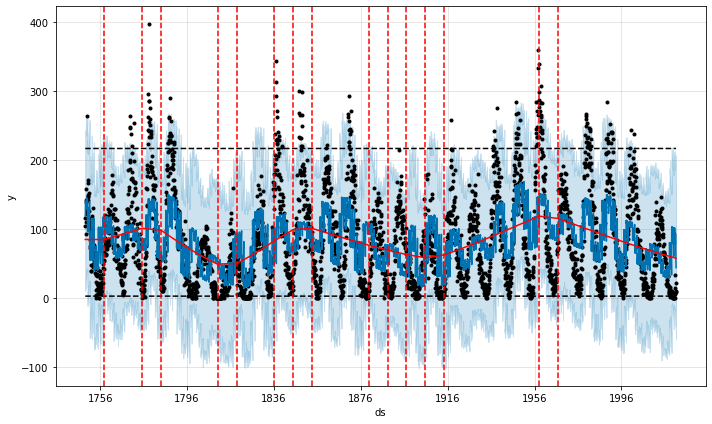

In [82]:
from fbprophet.plot import add_changepoints_to_plot
fig_4_lg_1 = mdl_lg_1.plot(forecast_lg_1,plot_cap=True, uncertainty=True)
a_4_lg_1 = add_changepoints_to_plot(fig_4_lg_1.gca(), mdl_lg_1, forecast_lg_1)

# Cross Validation 1 Month

In [83]:
from fbprophet.diagnostics import cross_validation

In [84]:
Monthly_CV_lg_1 = cross_validation(mdl_lg_1, initial='99000 days',period='15 days', horizon='30.5 days')
Monthly_CV_lg_1.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2020-02-21 12:00:00 and 2021-01-01 12:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-01,110.764522,-0.352170,223.627899,1.5,2020-02-21 12:00:00
1,2020-04-01,103.320909,-12.731787,210.749722,5.2,2020-03-07 12:00:00
2,2020-04-01,103.320909,-5.833497,213.819182,5.2,2020-03-22 12:00:00
3,2020-05-01,108.422851,-3.936846,222.417095,0.2,2020-04-06 12:00:00
4,2020-05-01,108.422851,-9.416605,230.886045,0.2,2020-04-21 12:00:00


In [85]:
from fbprophet.diagnostics import performance_metrics

In [86]:
Monthly_PM_lg_1 = performance_metrics(Monthly_CV_lg_1)
Monthly_PM_lg_1.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days 12:00:00,10669.949049,103.295445,103.171880,279.991829,279.991829,1.0
1,10 days 12:00:00,9519.040691,97.565571,97.530010,16.390855,16.390855,1.0
2,11 days 12:00:00,8908.099879,94.382731,94.309376,14.268011,14.253275,1.0
3,12 days 12:00:00,6705.170085,81.885103,81.884409,70.811061,70.811061,1.0
4,13 days 12:00:00,3774.425724,61.436355,59.858061,2.367027,2.367027,1.0


In [87]:
from fbprophet.plot import plot_cross_validation_metric

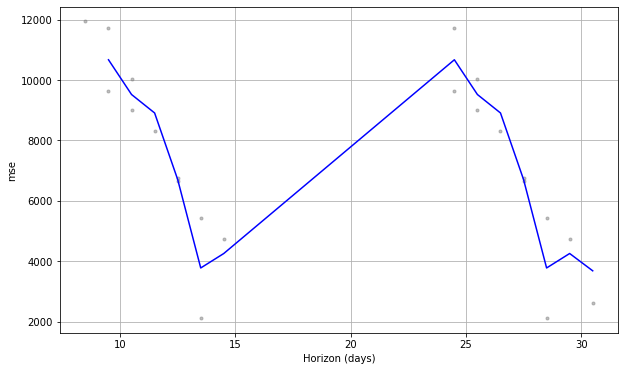

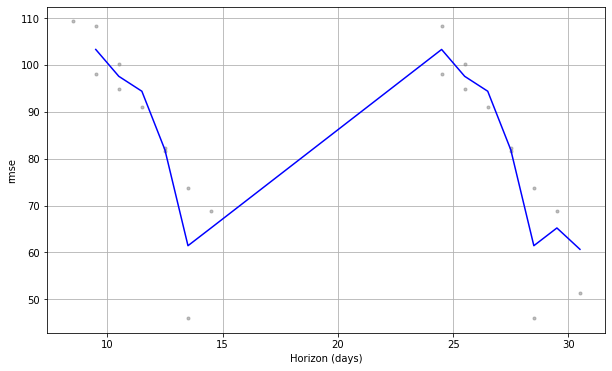

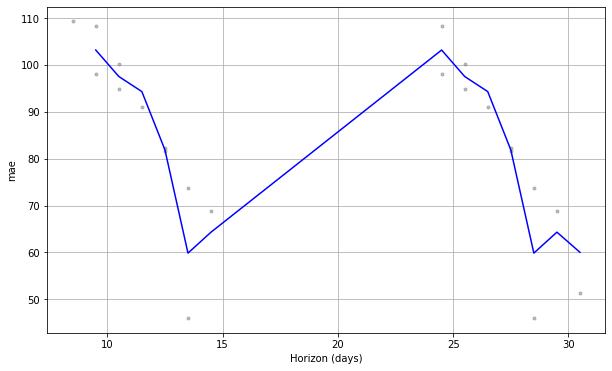

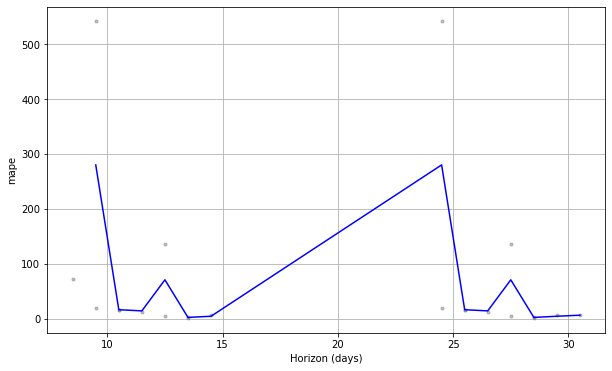

In [88]:
plt_mse = plot_cross_validation_metric(Monthly_CV_lg_1 ,metric='mse')
plt_rmse = plot_cross_validation_metric(Monthly_CV_lg_1 ,metric='rmse')
plt_mae = plot_cross_validation_metric(Monthly_CV_lg_1 ,metric='mae')
plt_mape = plot_cross_validation_metric(Monthly_CV_lg_1 ,metric='mape')

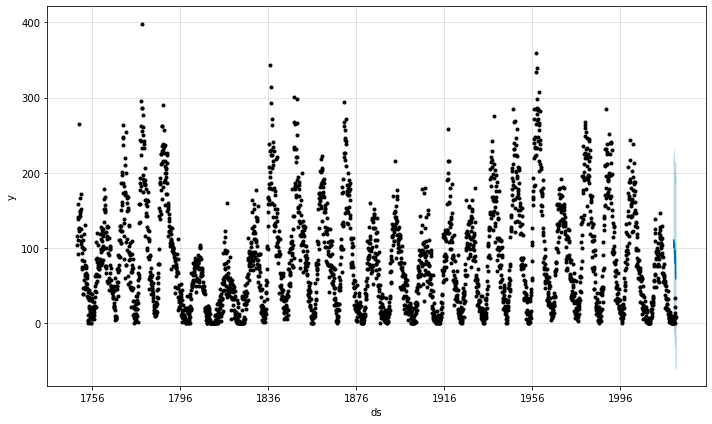

In [89]:
plot_9_lg_1 = mdl_lg_1.plot(Monthly_CV_lg_1)